In [1]:
import numpy as np



In [2]:
S0 = 10
B0 = 10
S1 = np.array((20,5))
B1 = np.array((11,11));

In [3]:
M0 = np.array((S0,B0)) # model economy initial 

M1 = np.array((S1,B1))

K = 14.5 # strike price of call option 

In [4]:
C1 = np.maximum(S1 - K,0); # uncertain pay of from stock  

In [5]:
M1 = M1.T

In [6]:
M1

array([[20, 11],
       [ 5, 11]])

In [7]:
phi = np.linalg.solve(M1,C1)
phi

array([ 0.36666667, -0.16666667])

In [8]:
#utility function 

def u(x):
    return np.sqrt(x)

phi_A = np.array((0.75,0.25)) # this is th fraction of things in the portfolio
phi_D = np.array((0.25,0.75))



In [9]:
np.dot(M0,phi_A) == np.dot(M0,phi_D)

True

In [10]:
A1 = np.dot(M1,phi_A)
D1 = np.dot(M1,phi_D)

P = np.array((0.5,0.5))

def EUT(x):
    return np.dot(P,u(x)) # EUT function is sigma probability times utility function




In [11]:
EUT(A1)

3.381292321692286

In [12]:
EUT(D1)

3.3611309730623735

In [13]:
# what is the best portfolio to maximise profit

from scipy.optimize import minimize
w=10
cons = {'type':'eq','fun': lambda phi: np.dot(M0,phi) - w} # budget constraint to minimize

def EUT_(phi):
    x = np.dot(M1,phi)
    return EUT(x)
opt = minimize(lambda phi: -EUT_(phi),x0 = phi_A, constraints = cons) # optimize the budget constraints for w = 10 

opt


     fun: -3.385015999493397
     jac: array([-1.69249132, -1.69253424])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.61122474, 0.38877526])

In [14]:
# MVP does not require the data of company cash flow or future performance
# needs just share price and statistics on these prices 

# sharpe ratio, helps judge the risk adjusted performance = expected return / expected volatility

# return of Stock and Bond 
rS = S1/S0 - 1
rB = B1/B0 - 1 

def mu(rX):
    return np.dot(P,rX)





In [15]:
print('stock return',mu(rS))
print('bond return',mu(rB))

stock return 0.25
bond return 0.10000000000000009


In [16]:
rM = M1/M0 -1 # return matrix of traded assets 
print(mu(rM)) # expected return vector

[0.25 0.1 ]


In [17]:
# estimating the variance, volatility and covar matrix 

def var(rX):
    return ((rX - mu(rX))**2).mean()

print('var rS = ',var(rS))
print('var rB = ',var(rB))


var rS =  0.5625
var rB =  0.0


In [18]:
np.cov(rM.T,aweights = P,ddof = 0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [19]:
# volatility and expected return 

phi = np.array([0.5,0.5])

def mu_phi(phi):
    return np.dot(phi,mu(rM))

mu_phi(phi) # expected return 

def var_phi(phi):
    cv = np.cov(rM.T,aweights = P,ddof = 0)
    return np.dot(phi,np.dot(cv,phi))

var_phi(phi)

def sigma_phi(phi):
    return var_phi(phi)**0.5

sigma_phi(phi)


0.375

In [20]:
#investment opportunity set

Text(0, 0.5, 'Expected return')

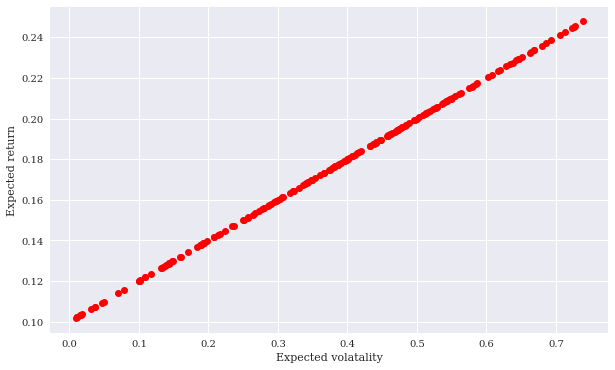

In [21]:
from pylab import plt,mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

phi_mcs = np.random.random((2,200)) # initialise random portfolio composition, picks a random number between 0 and 1 
phi_mcs = (phi_mcs/phi_mcs.sum(axis = 0)).T  # normalize 

mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

plt.figure(figsize = (10,6))
plt.plot(mcs[:,0],mcs[:,1],'ro')
plt.xlabel('Expected volatality')
plt.ylabel('Expected return')


In [22]:
import numpy as np 


P = np.ones(3)/3; # probablity vector 

# two risky assets S and T 

S1 = np.array((20,10,5))
S0 = 10
T0 = 10
T1 = np.array((1,12,13))

M0 = np.array((S0,T0))
M1 = np.array((S1,T1)).T
rM = M1/M0 - 1


In [23]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

Text(0, 0.5, 'expected return')

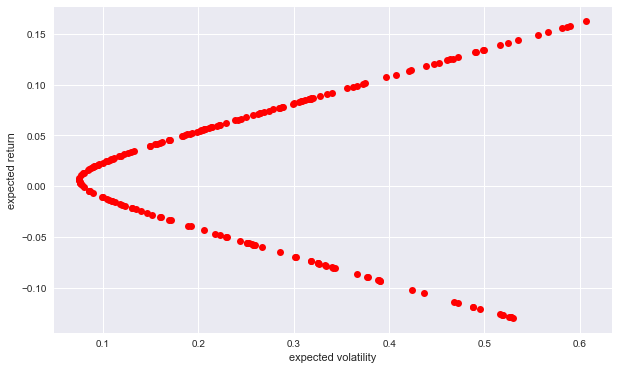

In [24]:
plt.figure(figsize = (10,6))
plt.style.use('seaborn')
plt.plot(mcs[:,0],mcs[:,1],'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return')

In [25]:
def sharpe(phi):
    return mu_phi(phi)/sigma_phi(phi)


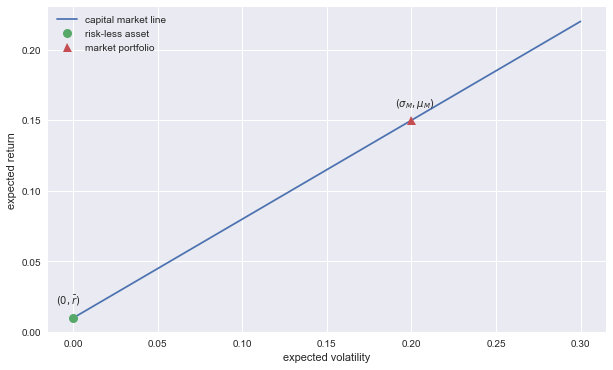

In [27]:
plt.figure(figsize=(10, 6))
plt.plot((0, 0.3), (0.01, 0.22), label='capital market line') 
plt.plot(0, 0.01, 'o', ms=9, label='risk-less asset') 
plt.plot(0.2, 0.15, '^', ms=9, label='market portfolio') 
plt.annotate('$(0, \\bar{r})$', (0, 0.01), (-0.01, 0.02)) 
plt.annotate('$(\sigma_M, \mu_M)$', (0.2, 0.15), (0.19, 0.16)) 
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [28]:
phi_M = np.array((0.8,0.2))
mu_M = mu_phi(phi_M)
sigma_M = sigma_phi(phi_M)
r = 0.0025 # risk free rate for lending in borrowing

plt.figure(figsize = (10,6))






0.10666666666666666